<a href="https://colab.research.google.com/github/ms2288/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [3]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [4]:
import numpy as np

In [17]:
corr=df.corr(method='pearson')#상관관계 계산
corr=corr['price']
corr=pd.DataFrame(corr)
corr=corr.drop(['price'],axis=0)#price열 제거
corr.loc[corr.idxmax()]#열값중에서 최대값인 행 가져오기
answer='sqft_living'
print("최대값 행 이름 : {0}, 최대값 : {1}".format(answer,corr.max()))

최대값 행 이름 : sqft_living, 최대값 : price    0.702035
dtype: float64


* 타겟값인 price와 상관관계가 가장 높은 특성은 sqt_living으로 상관계수는 0.702035을 가진다


### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

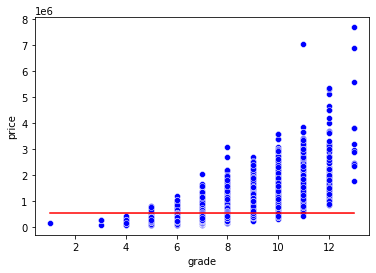

In [18]:
import seaborn as sns
x = df['grade']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

* 회기모델 라이브러리 불러오기

In [19]:
from sklearn.linear_model import LinearRegression

* 예측모델 인스턴스를 만듭니다

In [20]:
model = LinearRegression()

* X 특성들의 테이블과, y 타겟 벡터를 만듭니다

In [21]:
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

* 모델을 학습(fit)합니다

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 학습되어 얻은 회귀모델을 바탕으로 예측한 결과 grade가 6일때 prices는 194700.3977405입니다.

In [26]:
X_test = [[6]]
model.predict(X_test)

array([[194700.3977405]])

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

* grade 범위 확인

In [33]:
print('grade의 최솟값 : ',df['grade'].min())
print('grade의 최댓값 : ',df['grade'].max())

grade의 최솟값 :  1
grade의 최댓값 :  13


* 범위값에서 벗어난 임의의 정수 생성

In [39]:
import random
rand_num = [random.randint(14,50) for i in range(0,50)]# 14~50사이의 정수 50개 생성
rand_num

[42,
 39,
 16,
 24,
 26,
 50,
 47,
 45,
 15,
 34,
 50,
 28,
 38,
 23,
 34,
 19,
 40,
 20,
 36,
 39,
 49,
 14,
 25,
 50,
 47,
 29,
 37,
 29,
 14,
 48,
 48,
 34,
 17,
 43,
 44,
 48,
 19,
 38,
 14,
 37,
 24,
 34,
 16,
 40,
 16,
 27,
 47,
 21,
 49,
 48]

* random값으로부터 예측후 결과 price_ex에 저장

In [41]:
price_ex = []
for element in rand_num:
  price_ex.append(model.predict([[element]])[0][0])
price_ex

[7699172.64624215,
 7073799.9588670125,
 2279276.022324292,
 3946936.5219913246,
 4363851.646908083,
 9366833.145909183,
 8741460.458534047,
 8324545.333617288,
 2070818.4598659128,
 6031512.146575117,
 9366833.145909183,
 4780766.771824841,
 6865342.396408633,
 3738478.9595329463,
 6031512.146575117,
 2904648.7096994296,
 7282257.521325392,
 3113106.2721578088,
 6448427.271491875,
 7073799.9588670125,
 9158375.583450802,
 1862360.8974075336,
 4155394.084449704,
 9366833.145909183,
 8741460.458534047,
 4989224.334283221,
 6656884.833950254,
 4989224.334283221,
 1862360.8974075336,
 8949918.020992424,
 8949918.020992424,
 6031512.146575117,
 2487733.584782671,
 7907630.208700529,
 8116087.7711589085,
 8949918.020992424,
 2904648.7096994296,
 6865342.396408633,
 1862360.8974075336,
 6656884.833950254,
 3946936.5219913246,
 6031512.146575117,
 2279276.022324292,
 7282257.521325392,
 2279276.022324292,
 4572309.209366462,
 8741460.458534047,
 3321563.834616188,
 9158375.583450802,
 8949918

* 기존갑은 검은색 새로운 데이터에 대한 예측값은 파란색으로 표시

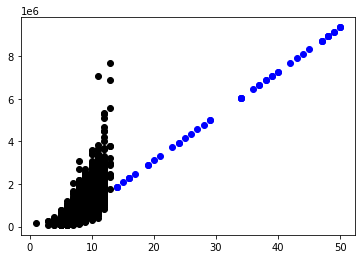

In [43]:
import matplotlib.pyplot as plt

## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(rand_num, price_ex, color='blue', linewidth=1);

In [45]:
### 이곳에서 과제를 진행해 주세요 ###
coefficent=model.coef_[0][0]
print('grade와 price 상관계수 확인 : ',coefficent)

grade와 price 상관계수 확인 :  208457.56245837914


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [49]:
#학습시킬 데이터
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]
#예측모델 인스턴스 생성
model2 = LinearRegression()
## 모델을 학습(fit)합니다
model2.fit(X_train, y_train)
#회귀 계수 확인
print('grade와 price간 상관계수 : {0}\nsqft_living간 price간 상관계수 : {1}'.format(model.coef_[0][0],model2.coef_[0][0]))

grade와 price간 상관계수 : 208457.56245837914
sqft_living간 price간 상관계수 : 280.62356789744825


### grade와 price간 상관계수가 sqft_living간 price간 상관계수보다 훨씬 커 단위변위에 따라 price에 더 크게 영향을 미치는 요소는 grade이다.

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###